# Motivação

Ao definirmos uma rede a quantidade de conexões é relativa a:
- Número de neurônios da camada anterior
- Número de neurônios da camada atual

Se linearizasse-mos uma imagem $NxN$ para usar uma MLP (entrada de uma dimensão) tériamos uma entrada com $N^2$ neurônios. No geral, para mantermos uma boa representação, a camada subsequente deve ser diretamente proporcional a de entrada. Ou seja, se no menor dos casos essa camada subsequente tiver $N^2$ neurônios, teremos, só nessas duas camadas, $N^4$ conexões. No caso de uma imagem $256x256$ isso representaria cerca de $4$bilhões de pesos, o que ocuparia $17$ GB de memória só para armazenar a rede.

Por esse motivo, não utilizamos MLP para imagens. Sendo assim, usamos <span style="color: blue">Redes Neurais Convolucionais</span> pois se baseiam na operação de <span style="color: blue">Convolução</span>.

Nas <span style="color: blue">CNN's</span> o número de parâmetros não está mais vinculado ao tamanho da entrada além de interpretar a imagem de maneira mais intuitiva.

## Características da MLP

- Recebe um vetor
- Cada neurônio posterior se conecta a todos os neurônios anteriores(fully connected)
- Imagens são volumes (RGB): $3~x~256~x~256 = 196.608$ pixels

# CNN

As <span style="color: blue">Redes Neurais Convolucionais</span> sãp aptas a trabalhar com volumes 3D (altura, largura e profundidade). 

O que acontece quando trasnformamos uma imagem com uma rede convolucional, é que a imagem passa a ser um <span style="color: blue">mapa de características</span> também em 3 dimensões.

Os <span style="color: blue">neurônios</span> também são organizados em 3D e possuem <span style="color: blue">campo de visão limitado</span>.
<br>
<br>
<img src="figures/basic_archteture.png" style="width: 500px">

- <span style="color: blue">Convolução</span>: Transforma a imagem em características
- <span style="color: blue">Pooling</span>: É um processo de downsample

A CNN fica justamente alternando entre <span style="color: green">Transformação</span> e <span style="color: green">Subamostragem</span>. Seguindo a lógica, quanto mais profunda a rede, mais mapas de características ela vai ter.

As camadas mais comuns são:
- Conv - Convolucional
- Pool - Pooling
- FC - Fully Connected

Da maneira como as camadas estão organizadas irão produzir um <span style="color: blue">Aprendizado Hierárquico</span>
- As primeiras camadas irão aprender características de mais baixo nível
- As últimas camadas irão aprender características de mais alto nível

Logo, a CNN transforma hierarquicamente a imagem em características de cada vez mais alto nível.

In [1]:
import matplotlib.pyplot as plt
from matplotlib import patches
import numpy as np

import torch
from torchvision import datasets, transforms

In [2]:
MNIST = datasets.MNIST(
    root='./datasets/',
    train=False,
    transform=transforms.ToTensor(),
    download=True
)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./datasets/MNIST/raw/train-images-idx3-ubyte.gz to ./datasets/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./datasets/MNIST/raw/train-labels-idx1-ubyte.gz to ./datasets/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./datasets/MNIST/raw/t10k-images-idx3-ubyte.gz to ./datasets/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./datasets/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./datasets/MNIST/raw



In [3]:
dado, rotulo = MNIST[0]

In [4]:
type(dado)

torch.Tensor

In [5]:
dado.size()

torch.Size([1, 28, 28])

In [6]:
type(rotulo)

int

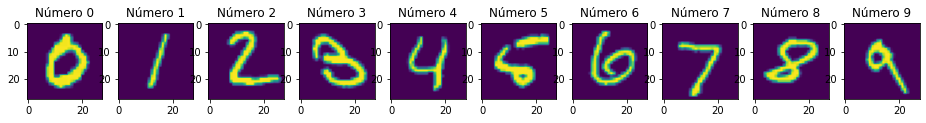

In [7]:
fig, ax = plt.subplots(1, 10, figsize=(16, 5))

for i in range(10):
    itr = 0
    
    while True:
        dado, rotulo = MNIST[itr]
        
        if rotulo == i:
            ax[i].imshow(dado[0])
            ax[i].set_title(f"Número {rotulo}")
            itr=0
            break
        else:
            itr += 1

# Detecção

In [8]:
VOC = datasets.VOCDetection(
    root='./datasets/',
    year='2012',
    image_set='train',
    download=True,
    transform=transforms.ToTensor()
)

  0%|          | 0/1999639040 [00:00<?, ?it/s]

Extracting ./datasets/VOCtrainval_11-May-2012.tar to ./datasets/


In [9]:
dado, rotulo = VOC[0]

print(type(dado), type(rotulo))

<class 'torch.Tensor'> <class 'dict'>


In [10]:
dado.size()

torch.Size([3, 442, 500])

Por padrão, o PyTorch adota o formato **channel first**. Já bibliotecas de visualizção, como matplotlib, representam as imagens na última dimensão.

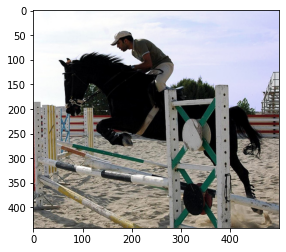

In [11]:
dado = dado.permute(1, 2, 0)

plt.imshow(dado)

In [12]:
rotulo

{'annotation': {'filename': '2008_000008.jpg',
  'folder': 'VOC2012',
  'object': [{'bndbox': {'xmax': '471',
     'xmin': '53',
     'ymax': '420',
     'ymin': '87'},
    'difficult': '0',
    'name': 'horse',
    'occluded': '1',
    'pose': 'Left',
    'truncated': '0'},
   {'bndbox': {'xmax': '289', 'xmin': '158', 'ymax': '167', 'ymin': '44'},
    'difficult': '0',
    'name': 'person',
    'occluded': '0',
    'pose': 'Unspecified',
    'truncated': '1'}],
  'segmented': '0',
  'size': {'depth': '3', 'height': '442', 'width': '500'},
  'source': {'annotation': 'PASCAL VOC2008',
   'database': 'The VOC2008 Database',
   'image': 'flickr'}}}

In [13]:
bbox = rotulo['annotation']['object'][0]['bndbox']
xmax = int(bbox['xmax'])
xmin = int(bbox['xmin'])
ymax = int(bbox['ymax'])
ymin = int(bbox['ymin'])

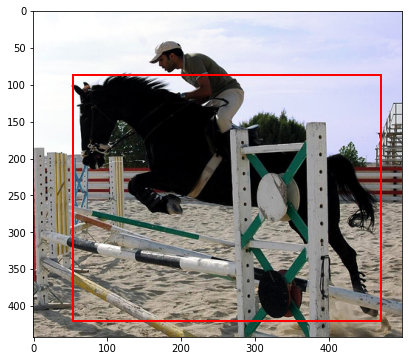

In [14]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.imshow(dado)

w, h = xmax - xmin, ymax - ymin
rect = patches.Rectangle((xmin, ymin), w, h, fill=False, color='r', linewidth=2)
ax.add_patch(rect)

Como seria a última camada de uma rede que detectasse os objetos?

Nesse caso, estamos tratando de uma regressão para descobrirmos:
- `xmin`
- `xmax`
- `ymin`
- `ymax`

Ou seja, precisamos de 4 neurônios no final

# Segmentação

In [15]:
VOCs = datasets.VOCSegmentation(
    root='./datasets/',
    year='2012',
    image_set='train',
    download=True,
    transform=transforms.ToTensor(),
    target_transform=transforms.ToTensor()
)

Using downloaded and verified file: ./datasets/VOCtrainval_11-May-2012.tar
Extracting ./datasets/VOCtrainval_11-May-2012.tar to ./datasets/


In [16]:
dado, rotulo = VOCs[0]

In [17]:
print(type(dado), type(rotulo))

<class 'torch.Tensor'> <class 'torch.Tensor'>


In [18]:
dado.size()

torch.Size([3, 281, 500])

In [19]:
rotulo.size()

torch.Size([1, 281, 500])

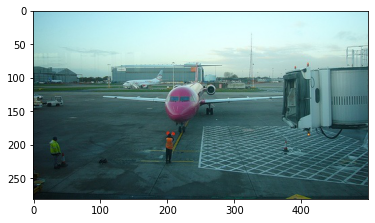

In [20]:
dado = dado.permute(1, 2, 0)

plt.imshow(dado)

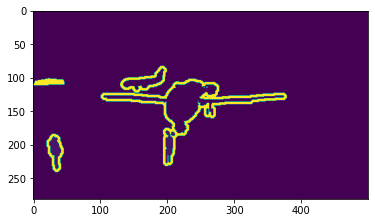

In [21]:
plt.imshow(rotulo[0])

In [22]:
rotulo[0].shape

torch.Size([281, 500])

Em geral, abordagens de segmentação baseadas em redes neurais não utilizam camadas totalmente conectadas, em vez disso utilizando arquiteturas totalmente convolucionais.

## Datasets

- ### Classificação:
    - [MNIST](https://pytorch.org/vision/main/generated/torchvision.datasets.MNIST.html) - Números
    - [FashionMNIST](https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html#torchvision.datasets.FashionMNIST) - Roupas
    - [KMNIST](https://pytorch.org/vision/stable/generated/torchvision.datasets.KMNIST.html#torchvision.datasets.KMNIST) - Caracteres japoneses
    - [EMNIST](https://pytorch.org/vision/stable/generated/torchvision.datasets.EMNIST.html#torchvision.datasets.EMNIST) - Letras
    - [CIFAR10](https://pytorch.org/vision/stable/generated/torchvision.datasets.CIFAR10.html#torchvision.datasets.CIFAR10) - Imagens naturais (com ruído, fundo, variação de luz, etc.) com 10 categorias
    - [CIFAR100](https://pytorch.org/vision/stable/generated/torchvision.datasets.CIFAR100.html#torchvision.datasets.CIFAR100) - Imagens naturais (com ruído, fundo, variação de luz, etc.) com 100 categorias
    - [ImageNet](https://pytorch.org/vision/stable/generated/torchvision.datasets.ImageNet.html#torchvision.datasets.ImageNet) - Mais de um milhão de imagens anotadas que variam entre 1000 categorias de objetos
    - [LSUN](https://pytorch.org/vision/stable/generated/torchvision.datasets.LSUN.html#torchvision.datasets.LSUN) - Cenas
    - [CelebA](https://pytorch.org/vision/stable/generated/torchvision.datasets.CelebA.html#torchvision.datasets.CelebA) - Imagens de celebridades
    
- ### Detecção:
    - [SVHN](https://pytorch.org/vision/stable/generated/torchvision.datasets.CelebA.html#torchvision.datasets.CelebA) - Imagens naturais de números provenientes do Google Street View
    - [CocoDetection](https://pytorch.org/vision/stable/generated/torchvision.datasets.CocoDetection.html#torchvision.datasets.CocoDetection) - É uma competição que fornece um dataset de grande escala 
    - [PascalVOC - Detection](https://pytorch.org/vision/stable/generated/torchvision.datasets.VOCDetection.html#torchvision.datasets.VOCDetection) - Também foi uma popular competição com múltiplas modalidades que consolidou um dos principais datasets de imagem
    
- ### Segmentação:
    - [PascalVOC - Segmentation](https://pytorch.org/vision/stable/generated/torchvision.datasets.VOCSegmentation.html#torchvision.datasets.VOCSegmentation) - Mesmas imagens de PascalVOC - Detection com mudança nos rótulos
    - [Cityscapes](https://pytorch.org/vision/stable/generated/torchvision.datasets.Cityscapes.html#torchvision.datasets.Cityscapes) - Cenas urbanas
    

# Convolução 1D

<br>
<br>
<center style="font-size: 26px">
    $h(x) = (f \ast g)(x) = \sum_{u = 0}^{U}f(u)g(x-u)$
</center>
<br>
<br>
Somatório do produto entre funções, sendo uma delas <span style="color: blue">invertida</span> e <span style="color: blue">deslocada</span>
<img src="https://upload.wikimedia.org/wikipedia/commons/6/6a/Convolution_of_box_signal_with_itself2.gif">

Vamos assumir o seguinte problema: você decidiu coletar dados de acelerômetro do celular, então você pediu para as pessoas colocarem o celular no bolso e saírem andando com ele, e aqui eu trouxe até um trabalho real que fez uma análise desse tipo e mostrou que a amplitude do sinal do acelerômetro fica mais ou menos como se fosse uma senóide ruidosa, então cada ciclo da senóide é um passo que a pessoa dá.

In [23]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.signal import convolve

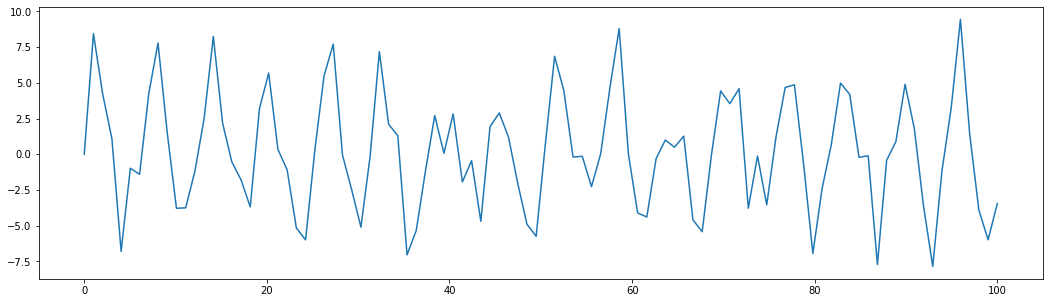

In [24]:
x = np.linspace(0, 100, 100)
y = 10 * np.sin(x) * np.random.rand(x.shape[0])

plt.figure(figsize=(18, 5))

plt.plot(x, y)

plt.show()

A seguinte função usa matplotlib para imprimir sinais 1D como imagens

In [25]:
def show(valores, title,):
    plt.figure(figsize=(len(valores), 2))
    plt.imshow(valores[np.newaxis, :], cmap='gray')
    
    for k, s in enumerate(valores):
        plt.text(k, 0, f'{s:.1f}', fontsize=16, color='red', ha='center', va='center')
    
    plt.title(title, fontsize=18)
    plt.yticks([])

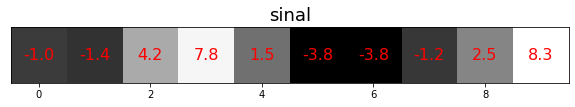

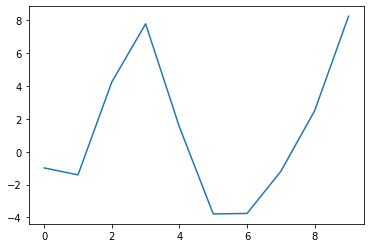

In [26]:
sinal = y[5: 15]

show(sinal, 'sinal')

plt.figure()
plt.plot(sinal)

No contexto de processamento de imagens, o <span style="color: blue">kernel</span> é um **filtro convolucional**. De forma prática, é uma matriz n-dimensional que será operada com o dado através de uma convolução.

Pode-se dizer que a convolução **mede a semelhança** entre os dois sinais.

precisamos portanto propor um kernel que simule o padão procurado: intervalos crescentes

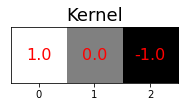

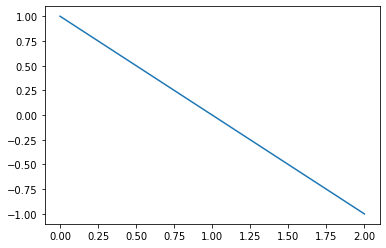

In [27]:
kernel = np.array([1, 0, -1])

show(kernel, 'Kernel')

plt.figure()
plt.plot(kernel)

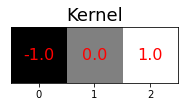

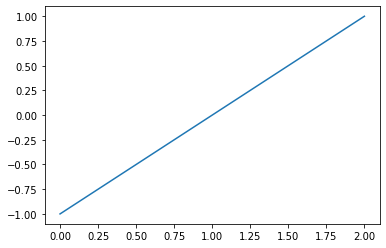

In [28]:
kernel_invertido = np.flip(kernel)

show(kernel_invertido, 'Kernel')

plt.figure()
plt.plot(kernel_invertido)

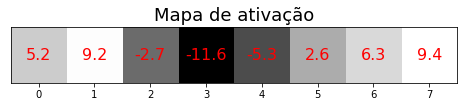

In [29]:
ativacao = convolve(sinal, kernel, mode='valid')

show(ativacao, 'Mapa de ativação')

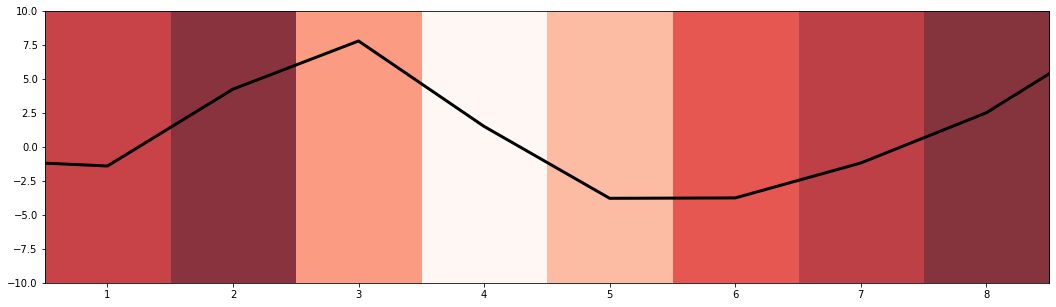

In [30]:
plt.figure(figsize=(18, 5))

plt.plot(sinal, color='black', linewidth=3)
plt.imshow(ativacao[np.newaxis, :], cmap='Reds', aspect='auto', alpha=0.8, extent=(0.5, 8.5, -10, 10))

plt.show()

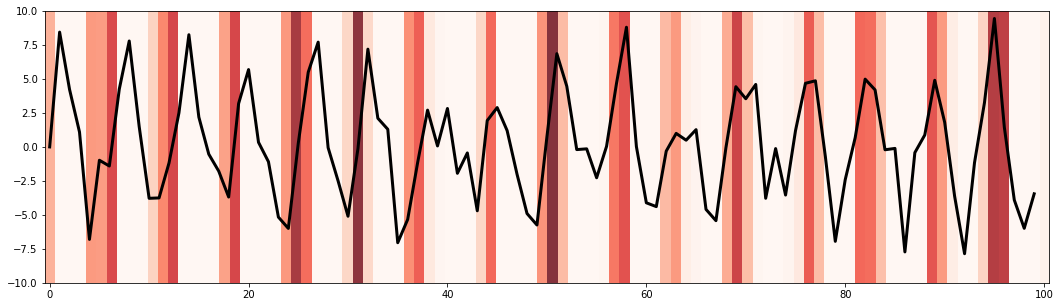

In [31]:
ativacao = convolve(y, kernel, mode='valid')
ativacao[ativacao < 0] = 0


plt.figure(figsize=(18, 5))

plt.plot(y, color='black', linewidth=3)
plt.imshow(ativacao[np.newaxis, :], cmap='Reds', aspect='auto', alpha=0.8, extent=(-0.5, 100.5, -10, 10))

plt.show()

# Convolução 2D

<img src="https://miro.medium.com/max/1086/0*HmJzkVVsEgvayuk8" style="height: 400px">

- Os pesos do kernel carregam o padrão visual que deve ser procurado na imagem
- O treinamento de redes convolucionais otimiza os pesos de múltiplos kernels

Exemplo do gif:

In [32]:
from scipy.signal import convolve2d

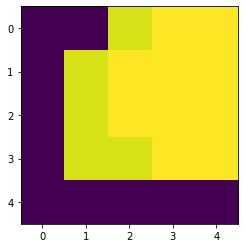

In [33]:
img = np.array([[0,  0, 75, 80, 80],
                [0, 75, 80, 80, 80],
                [0, 75, 80, 80, 80],
                [0, 75, 75, 80, 80],
                [0,  0,  0,  0,  0]])

plt.imshow(img)

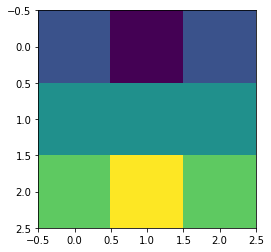

In [34]:
kernel = np.array([[-1, -2, -1],
                   [ 0,  0,  0],
                   [ 1,  2,  1]])

plt.imshow(kernel)

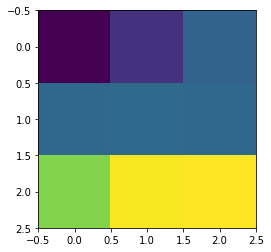

In [35]:
plt.imshow(convolve2d(img, kernel, mode='valid'))

Vamos assumir que buscamos detectar bordas em imagens. Usaremos como exemplo a imagem de uma parede de tijolos

In [36]:
from skimage import io, color, transform, data
from scipy.signal import convolve

import matplotlib.pyplot as plt
import numpy as np

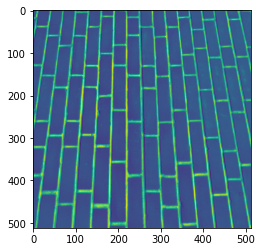

In [37]:
img = data.brick()

plt.imshow(img)

In [38]:
def show(valores, title):
    plt.figure(figsize=(len(valores), len(valores)))
    plt.imshow(valores)
    
    for i, line in enumerate(valores):
        for j, col in enumerate(line):
            plt.text(j, i, f'{col:.0f}', fontsize=16, color='red', ha='center', va='center')
    
    plt.title(title)
    plt.xticks([])
    plt.yticks([])
    
    plt.savefig(f"{title}.png", format='png', dpi=100, bbox_inches='tight')

Vamos agora definir kerneis diferentes:
- Kernel de bordas **verticais**
- Kernel de bordas **horizontais**

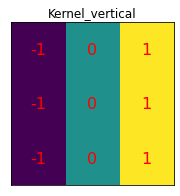

In [39]:
kernel_v = np.array([[-1, 0, 1],
                     [-1, 0, 1],
                     [-1, 0, 1]])

show(kernel_v, 'Kernel_vertical')

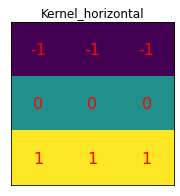

In [40]:
kernel_h = kernel_v.T

show(kernel_h, 'Kernel_horizontal')

O resultado da convolução entre o dado e o kernel é chamado de <span style="color: blue">Mapa de Características</span> ou <span style="color: blue">Mapa de Ativação</span>.

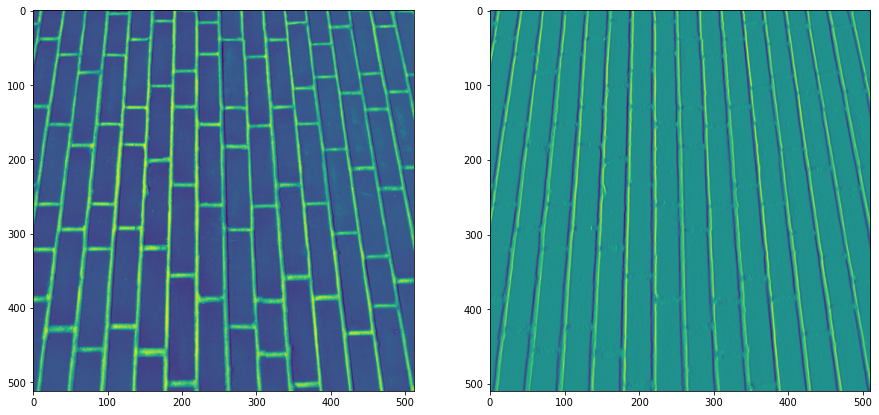

In [41]:
mapa_de_caracteristicas = convolve(img, kernel_v, mode='valid')

fig, ax = plt.subplots(1, 2, figsize=(15, 10))

ax[0].imshow(img)
ax[1].imshow(mapa_de_caracteristicas)

plt.show()

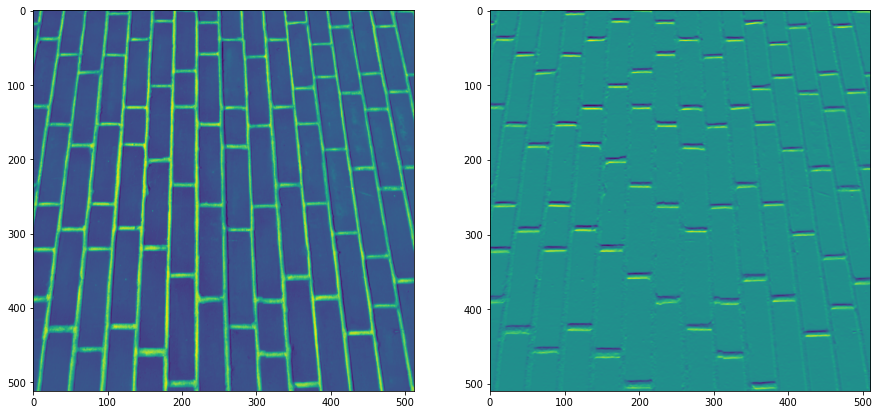

In [42]:
mapa_de_caracteristicas = convolve(img, kernel_h, mode='valid')

fig, ax = plt.subplots(1, 2, figsize=(15, 10))

ax[0].imshow(img)
ax[1].imshow(mapa_de_caracteristicas)

plt.show()

# Filtros Convolucionais
- **Kernels** são filtros convolucionais. Na prática são arrays n-dimensionais que são operados com o dado através da convolução.
- Os **pesos do kernel**, ou seja, elementos do array, carregam o padrão que será procurado no dado original.

Esses filtros podem ser projetados manualmente se já sabemos o padrão que queremos procurar. O que se observou com o tempo, foi que as primeiras camadas das redes convolucionais acabam convergindo para os filtros manualmente projetados.

In [43]:
import matplotlib.pyplot as plt
from skimage import io

from scipy.signal import convolve
import numpy as np

In [44]:
def show(img, kernel, resultado, titulo):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    plot = [img, kernel, resultado]
    titulos = ['Imagem', titulo, 'Mapa de Ativação']
    
    for k, ax in enumerate(axs):
        ax.imshow(plot[k])
        ax.set_yticks([])
        ax.set_xticks([])
        ax.set_title(titulos[k])
        
    for i, line in enumerate(kernel):
        for j, col in enumerate(line):
            axs[1].text(j, i, f'{col:.2f}', fontsize=12, color='red', ha='center', va='center')

In [45]:
img = io.imread('EU.jpg')
img.shape

(460, 460, 3)

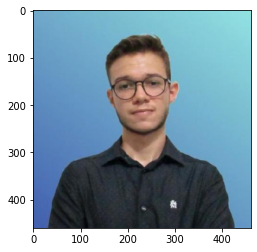

In [46]:
plt.imshow(img)

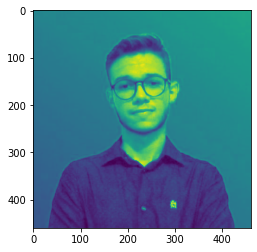

In [47]:
img = img[:, :, 0]
plt.imshow(img)

## Filtro da Média

Ao aplicar esse filtro a uma imagem, o mapa de ativção resultante será uma versão suavisada da imagem original (mais "borrada"). Esse efeito é alcançado usando a operação de convolução para tirara a média dos pixels de subregiões da imagem.

Os pesos desse kernel são definidos para replicar a operação da média, ou seja, para um filtro $3~x~3$ com $9$ pesos, temos:
<p style="font-size: 20px">
    $\frac{1}{9} \sum^{9}_{x=1}{p(x)}=\sum^{9}_{x=1}{\frac{p(x)}{9}}$
</p>

Vamos modelar 2 fltros:
- <span style="font-size: 16px">$3~x~3$ com todos os pesos iguais a $\frac{1}{3^2}$</span>
- <span style="font-size: 16px">$9~x~9$ com todos os pesos iguais a $\frac{1}{9^2}$</span>

In [48]:
kernel_media = np.ones((3, 3)) / (3**2)

kernel_media

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

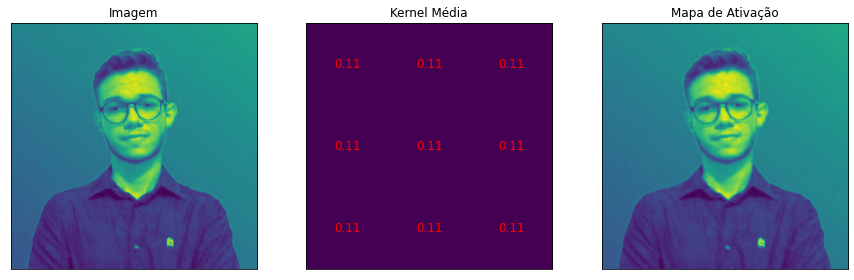

In [49]:
resultado = convolve(img, kernel_media, mode='valid')

show(img, kernel_media, resultado, 'Kernel Média')

In [50]:
kernel_media = np.ones((9, 9)) / (9**2)

kernel_media

array([[0.01234568, 0.01234568, 0.01234568, 0.01234568, 0.01234568,
        0.01234568, 0.01234568, 0.01234568, 0.01234568],
       [0.01234568, 0.01234568, 0.01234568, 0.01234568, 0.01234568,
        0.01234568, 0.01234568, 0.01234568, 0.01234568],
       [0.01234568, 0.01234568, 0.01234568, 0.01234568, 0.01234568,
        0.01234568, 0.01234568, 0.01234568, 0.01234568],
       [0.01234568, 0.01234568, 0.01234568, 0.01234568, 0.01234568,
        0.01234568, 0.01234568, 0.01234568, 0.01234568],
       [0.01234568, 0.01234568, 0.01234568, 0.01234568, 0.01234568,
        0.01234568, 0.01234568, 0.01234568, 0.01234568],
       [0.01234568, 0.01234568, 0.01234568, 0.01234568, 0.01234568,
        0.01234568, 0.01234568, 0.01234568, 0.01234568],
       [0.01234568, 0.01234568, 0.01234568, 0.01234568, 0.01234568,
        0.01234568, 0.01234568, 0.01234568, 0.01234568],
       [0.01234568, 0.01234568, 0.01234568, 0.01234568, 0.01234568,
        0.01234568, 0.01234568, 0.01234568, 0.01234568],


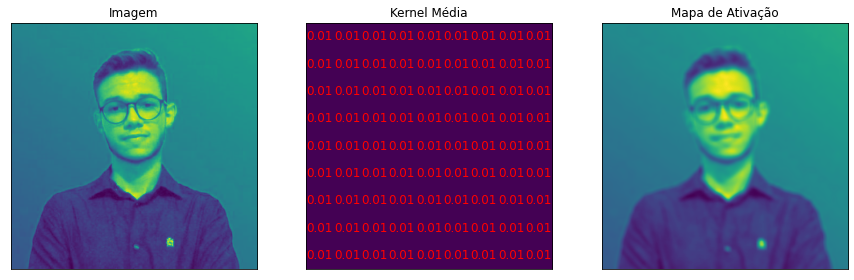

In [51]:
resultado = convolve(img, kernel_media, mode='valid')

show(img, kernel_media, resultado, 'Kernel Média')

## Filtro de Sobel

É um filtro utilizado para detecção de contornos. Consiste num operador que calcula diferenças finitas, dando uma aproximação do gradiente da intensidade dos pixels da imagem. Em cada ponto da imagem, o resultado da aplicação do filtro Sobel devolve o gradiente ou a norma deste vetor.

$G_x = \begin{bmatrix}
-1 & 0 & 1\\ 
-2 & 0 & 2\\ 
-1 & 0 & 1
\end{bmatrix}\ast \text{Imagem}$

$G_y = \begin{bmatrix}
 1 &  2 &  1\\ 
 0 &  0 &  0\\ 
-1 & -2 & -1
\end{bmatrix}\ast \text{Imagem}$

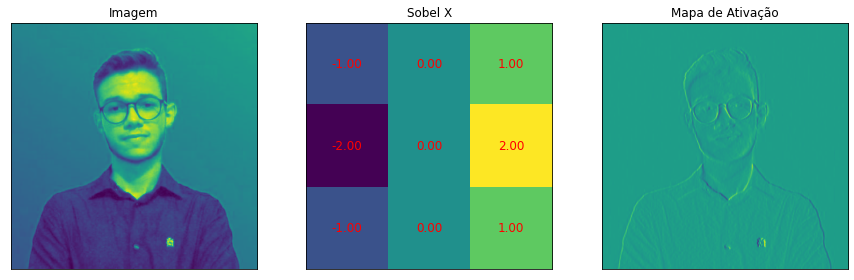

In [52]:
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

resultado_x = convolve(img, sobel_x, mode='valid')

show(img, sobel_x, resultado_x, 'Sobel X')

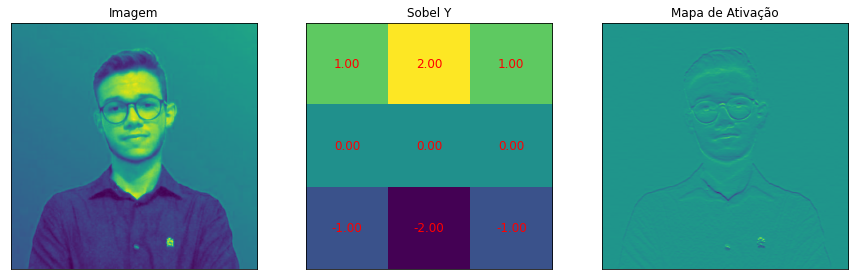

In [53]:
sobel_y = np.array([[ 1,  2,  1],
                    [ 0,  0,  0],
                    [-1, -2, -1]])

resultado_y = convolve(img, sobel_y, mode='valid')

show(img, sobel_y, resultado_y, 'Sobel Y')

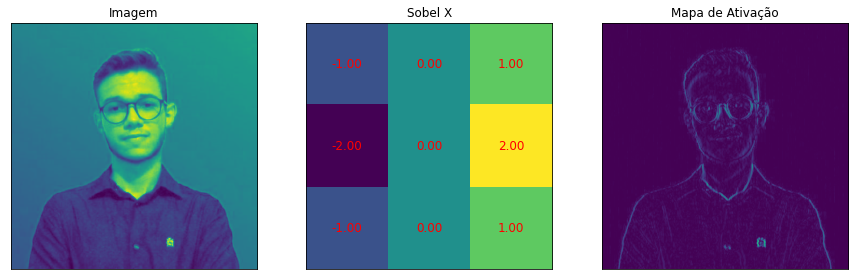

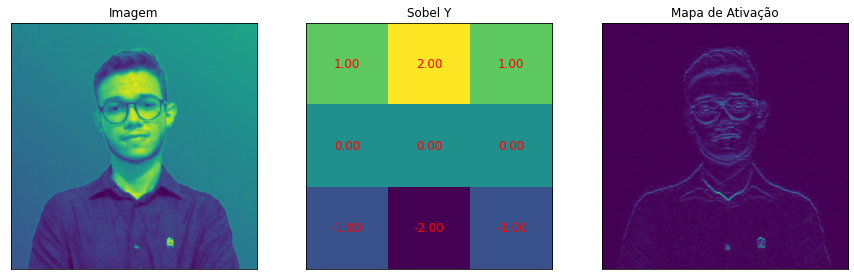

In [54]:
show(img, sobel_x, np.abs(resultado_x), 'Sobel X')
show(img, sobel_y, np.abs(resultado_y), 'Sobel Y')

## Filtro de Laplace

Semelhante ao de Sobel para detectar bordas mas com a diferença que destaca igualmente bordas de diferentes direções.

$\begin{bmatrix}
-1 & -1 & -1\\ 
-1 &  8 & -1\\ 
-1 & -1 & -1
\end{bmatrix}$

In [55]:
laplace = -1 * np.ones((3, 3))
laplace[1, 1] = 8

laplace

array([[-1., -1., -1.],
       [-1.,  8., -1.],
       [-1., -1., -1.]])

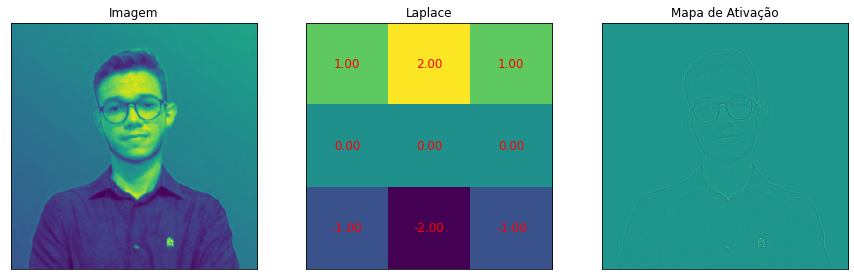

In [56]:
resultado = convolve(img, laplace, mode='valid')

show(img, sobel_y, resultado, 'Laplace')

Antes da popularização de Redes Neurais Convolucionais (CNN), o Reconhecimento de Padrões e o Processamento de Imagens eram realizados a partir de filtros manualmente projetados por profissionais da área de Visão Computacional.

Um dos conjuntos de filtros que ganhou maior popularidade por ser aplicável a diferentes domínios são os filtros Gabor. Projetados para análise de textura, esses filtros buscam padrões baixo nível, variando em orientação e na frequência do sinal. A imagem a seguir mostra alguns filtros retirados de um banco Gabor para ilustrar a sua variação.

<img src="figures/Gabor.png" style="height: 400px">

Enquanto o Gabor foi fruto da expertise de profissionais (humanos) de Reconhecimento de Padrões em imagens, filtros aprendidos por CNN são resultado de um processo automático baseado em dados. Mesmo tendo origens diferentes, possuem uma forte intersecção. A seguir imgens retiradas da AlexNet de um curso de Stanford.

<img src="figures/alexnet-1st-layer.png" style="height: 400px">


# Convoluções e Padrões Complexos

Os filtros seguem uma hierarquia. Os iniciais vão procurar padrões simples e os finais vão procurar padrões mais complexos.

Vamos voltar a imagem do avião

In [57]:
dado, rotulo = VOCs[0]

dado.shape

torch.Size([3, 281, 500])

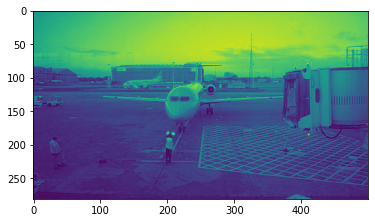

In [58]:
img = dado.permute(1, 2, 0)[:, :, 0].numpy()

plt.imshow(img)

Vamos criar um kernel para identificar a turbina

In [59]:
import matplotlib.patches as patches

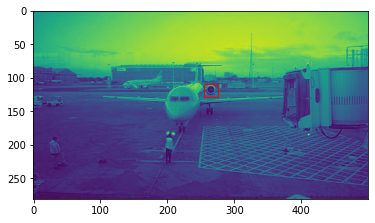

In [60]:
retangulo = [109, 129, 255, 275]

fig, ax = plt.subplots()

ax.imshow(img)
ax.add_patch(patches.Rectangle((retangulo[2], retangulo[0]), 
                               (retangulo[3] - retangulo[2]), 
                               (retangulo[1] - retangulo[0]),
                              color='red', fill=False))

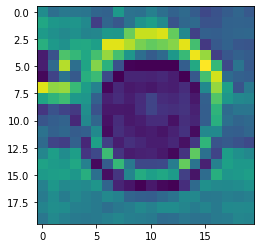

In [61]:
patch = img[retangulo[0]:retangulo[1], retangulo[2]:retangulo[3]]

plt.imshow(patch)

Precisamos subtrair da média para centralizar a distribuição

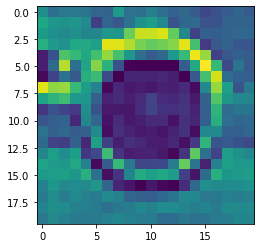

In [62]:
patch = patch - patch.mean()

plt.imshow(patch)

Precisamos inverter, pois na convolução o kernel será invertido novamente

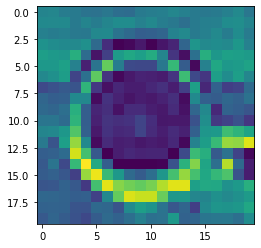

In [63]:
patch = np.flip(patch)

plt.imshow(patch)

Text(0.5, 1.0, 'Mapa de Ativação')

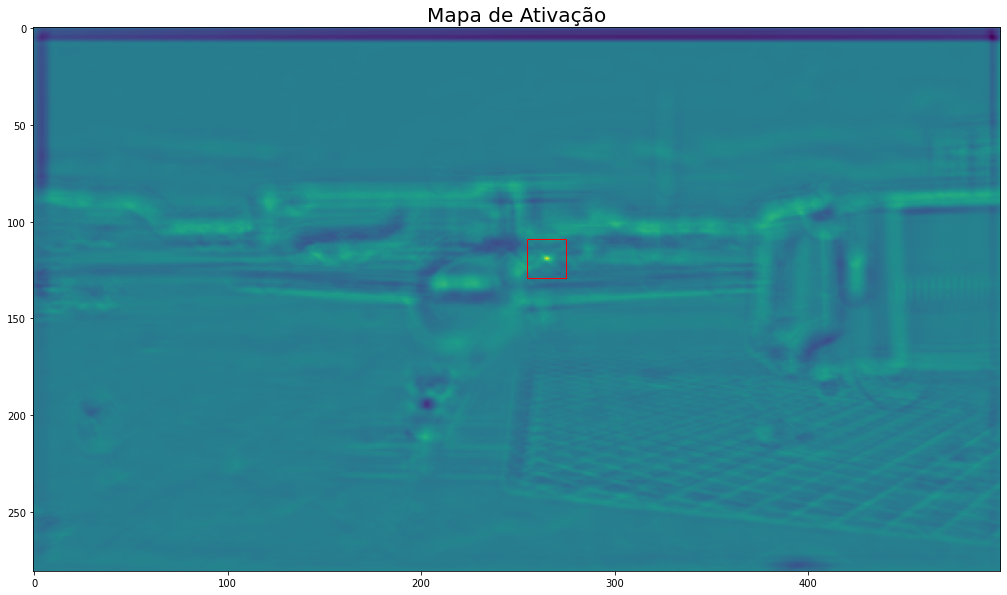

In [64]:
resultado = convolve(img, patch, mode='same')

fig, ax = plt.subplots(figsize=(18, 10))

ax.imshow(resultado)
ax.add_patch(patches.Rectangle((retangulo[2], retangulo[0]), 
                               (retangulo[3] - retangulo[2]), 
                               (retangulo[1] - retangulo[0]),
                              color='red', fill=False))

ax.set_title('Mapa de Ativação', fontsize=20)

Usamos o `mode='same'` para mantermos a dimensionalidade da imagem.

No ponto onde a turbina está, é o ponto de maior intensidade no mapa de ativação.

No caso de CNNs, para identificar padrões complexos, a imagem precisa ser simplificada no meio do processo. Não podemos pegar a imagem original e já buscar padrões complexos nela, seria muito sensível a variações de imagem.

# Camada Convolucional

Relembrando as camadas mais comuns em CNN
- Convolucionais - Transformação
- Pooling - Subamostragem
- Batch Normalization - Normalização das características (melhora muito o treinamento)
- Totalmente conectadas - MLP

### Convoluções com imagens de 1 canal
<img src="figures/1canal_conv.png">

### Convoluções com imagens de 3 canais
<img src="figures/3canais_conv.png">

Mesmo com uma "profundidade", a convolução é 2D pois o kernel só irá se deslocar em 2 dimensões. Ou seja, é gerado apena 1 único mapa de ativação.

Quando estamos definindo uma MLP, nos perguntamos quantos neurônios vamos usar para cada camada. No caso das CNN, escolhemos a quantidade de kernels. Sendo assim, se definimos 4 camadas, definimos quantas características queremos que a rede aprenda.

<img src="figures/3canais_conv_2.png">

Sendo **N** o número de filtros usados, teremos **N** canais de saída (mapas de ativação)

## Parâmetros da camada

```python
conv = torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0)
```

- `in_channels` - Quantidade de canais de entrada
- `out_channels` - Quantidade de canais de saída

Para a **primeira** camada, `in_channels` representa o número de <span style="color: blue">canais da imagem</span> e `out_channels` o número de <span style="color: blue">mapas de ativação ou de filtros</span>

- `kernel_size` - Campo de visão do filtro
- `stride` - Tamanho do passo ao deslizar filtro
- `padding` - Preenchimento com zeros no dado

A resolução espacial do mapa de ativação é dada por:
<p style="font-size: 20px">
    $X_{out} = \frac{X_{in} - \text{kernel_size} + 2 \cdot \text{pading}}{\text{stride}} + 1$
</p>


# No Pytorch

In [65]:
import torch
from torch import nn

from skimage import data
import matplotlib.pyplot as plt

In [66]:
img = data.brick()
img_rgb = data.astronaut()

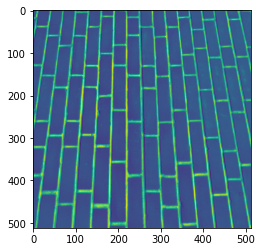

In [67]:
plt.imshow(img)

In [68]:
img.shape

(512, 512)

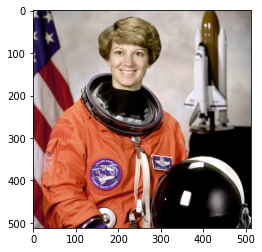

In [69]:
plt.imshow(img_rgb)

In [70]:
img_rgb.shape

(512, 512, 3)

- A entrada deve ser do tipo Tensor
- Formato: batch_size x chanels x height x width

In [71]:
conv = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3)

conv

Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))

In [72]:
img_tns = torch.Tensor(img)

img_tns.size()

torch.Size([512, 512])

In [73]:
img_tns = img_tns.view(1, 1, img_tns.size(0), img_tns.size(1))

img_tns.size()

torch.Size([1, 1, 512, 512])

In [74]:
mapa_ativacao = conv(img_tns)

mapa_ativacao.size()

torch.Size([1, 16, 510, 510])

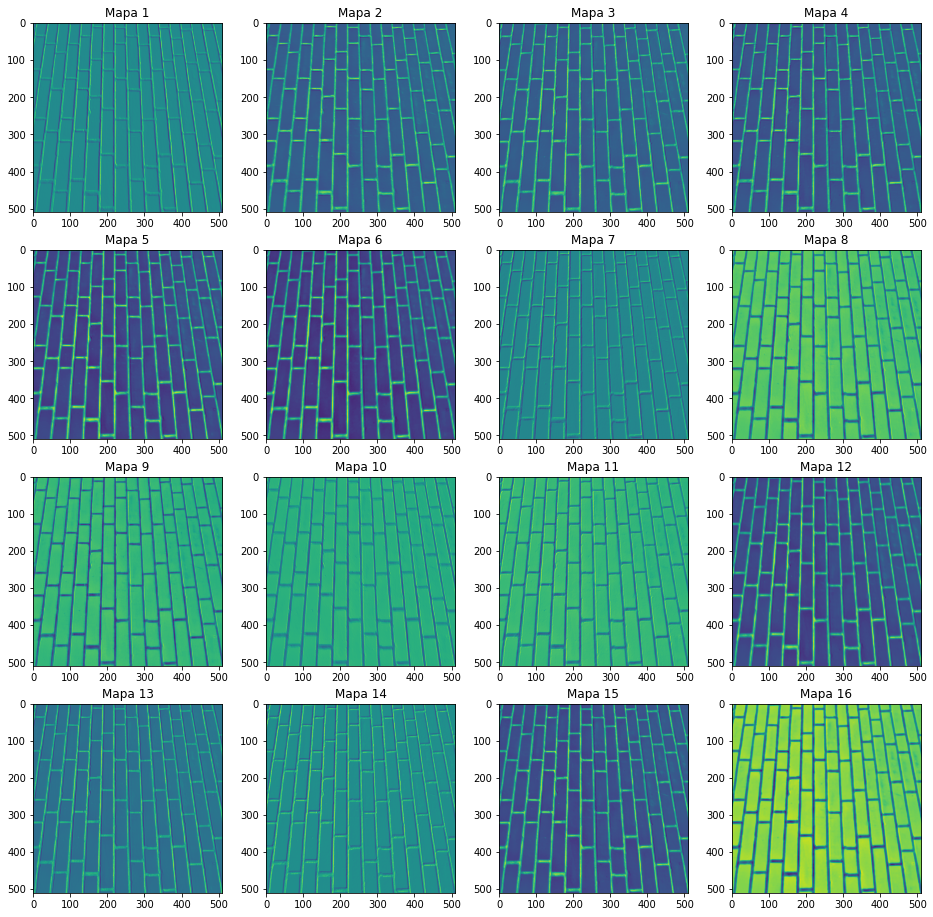

In [75]:
fig, ax = plt.subplots(4, 4, figsize=(16, 16))
for i in range(4):
    for j in range(4):
        n = 4 * i + j
        ax[i, j].imshow(mapa_ativacao[0][n].detach().numpy())
        ax[i, j].set_title(f"Mapa {n + 1}")

In [76]:
conv = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3)

conv

Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))

In [77]:
img_rgb_tns = torch.Tensor(img_rgb)

img_rgb_tns.size()

torch.Size([512, 512, 3])

In [78]:
img_rgb_tns = img_rgb_tns.permute(2, 0, 1)

img_rgb_tns.size()

torch.Size([3, 512, 512])

In [79]:
img_rgb_tns = img_rgb_tns.unsqueeze(0)

img_rgb_tns.size()

torch.Size([1, 3, 512, 512])

In [80]:
mapa_ativacao = conv(img_rgb_tns)

mapa_ativacao.size()

torch.Size([1, 16, 510, 510])

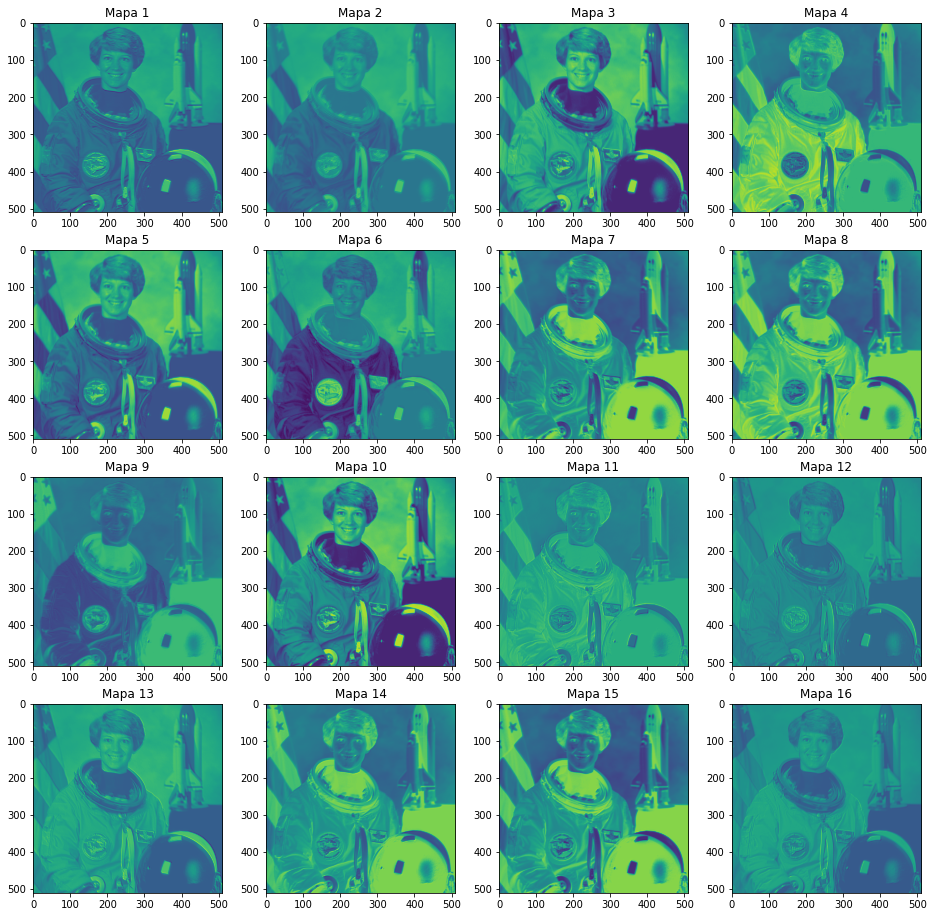

In [81]:
fig, ax = plt.subplots(4, 4, figsize=(16, 16))
for i in range(4):
    for j in range(4):
        n = 4 * i + j
        ax[i, j].imshow(mapa_ativacao[0][n].detach().numpy())
        ax[i, j].set_title(f"Mapa {n + 1}")

# Pooling

A subamostragem é um subconjunto <span style="color: blue">representativo</span> do dado original.

Ao subamostrar:
- Reduzimos a computação necessária para processar o dado
- Menos parâmetros para produzir característica representativas
- Menos chance de <span style="color: red">overfitting</span>

## MaxPool2d

<img src="figures/maxpool2d.png">

## No Pytorch

In [82]:
import torch
from torch import nn

from skimage import data

```python
torch.nn.MaxPool2d(kernel_size, stride=None, padding=0)
```

In [83]:
tns = torch.FloatTensor([[[1, 2, 3], 
                          [4, 5, 6], 
                          [7, 8, 9]]])

pool = nn.MaxPool2d(2, stride=1)
saida = pool(tns)

In [84]:
tns.size()

torch.Size([1, 3, 3])

In [85]:
saida.size()

torch.Size([1, 2, 2])

In [86]:
saida

tensor([[[5., 6.],
         [8., 9.]]])

Na imagem da astronauta

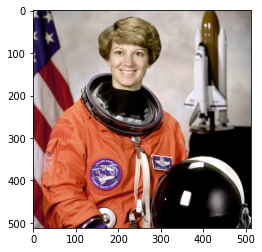

In [87]:
img_rgb = data.astronaut()

plt.imshow(img_rgb)

In [88]:
img_rgb_tns = torch.Tensor(img_rgb)

img_rgb_tns.size()

torch.Size([512, 512, 3])

In [89]:
img_rgb_tns = img_rgb_tns.permute(2, 0, 1)

img_rgb_tns.size()

torch.Size([3, 512, 512])

In [90]:
img_rgb_tns = img_rgb_tns.unsqueeze(0)

img_rgb_tns.size()

torch.Size([1, 3, 512, 512])

In [91]:
mapa_ativacao = conv(img_rgb_tns)

mapa_ativacao.shape

torch.Size([1, 16, 510, 510])

In [92]:
pool = nn.MaxPool2d(kernel_size=2)
saida = pool(mapa_ativacao)

saida.size()

torch.Size([1, 16, 255, 255])

In [93]:
512 / 256

2.0

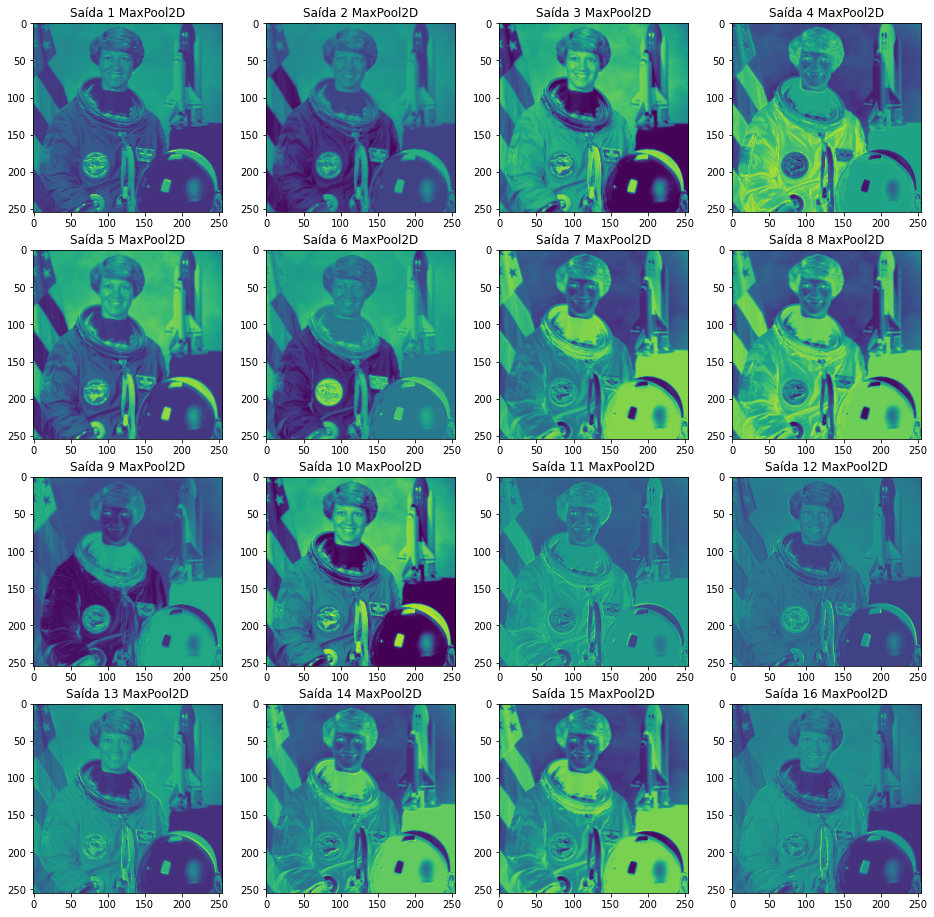

In [94]:
fig, ax = plt.subplots(4, 4, figsize=(16, 16))
for i in range(4):
    for j in range(4):
        n = 4 * i + j
        ax[i, j].imshow(saida[0][n].detach().numpy())
        ax[i, j].set_title(f"Saída {n + 1} MaxPool2D")

Como pode ser visto, tem um tamanho 4 vezes menor. Isso dá um ganho enorme de processamento.

# Batch Normalization

Dados centralizados e normalizados aceleram a convergência do treinamento. Ao fazer isso é mais fácil encontrar correlações. No entanto, essas operações são feitas no pré-processamento dos dados.

Os autores do **batch normalization** postularam que esta diferença na distribuição das ativações poderia dificultar a convergência da rede. Propuseram uma camada a ser adicionada após a convolução e antes da ativação não linear.

<p style="font-size: 20px">
    $BN(x) = \gamma \odot \frac{x-\hat{\mu}}{\hat{\sigma}} + \beta$
</p>

Na euqação acima é possível ver que há pesos adicionados a normalização. Esses pesos se ajustam na aprendizagem. Ou seja, são diferentes para cada saída de convolução.

```python
torch.nn.BatchNorm2d(num_features)
```

Onde `num_features` representa o número de canais (mapas de ativação) da camada anterior.

In [95]:
import torch
from torch import nn

from skimage import data

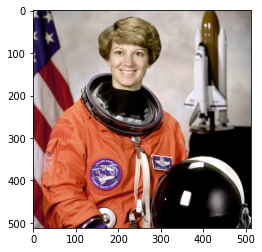

In [96]:
img_rgb = data.astronaut()

plt.imshow(img_rgb)

In [97]:
img_rgb_tns = torch.Tensor(img_rgb)
img_rgb_tns = img_rgb_tns.permute(2, 0, 1)
img_rgb_tns = img_rgb_tns.unsqueeze(0)

img_rgb_tns.size()

torch.Size([1, 3, 512, 512])

In [98]:
bloco_conv = nn.Sequential(
    nn.Conv2d(3, 16, kernel_size=3, padding=1),
    nn.BatchNorm2d(16),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2)
)

bloco_conv

Sequential(
  (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)

In [99]:
saida = bloco_conv(img_rgb_tns)

saida.size()

torch.Size([1, 16, 256, 256])

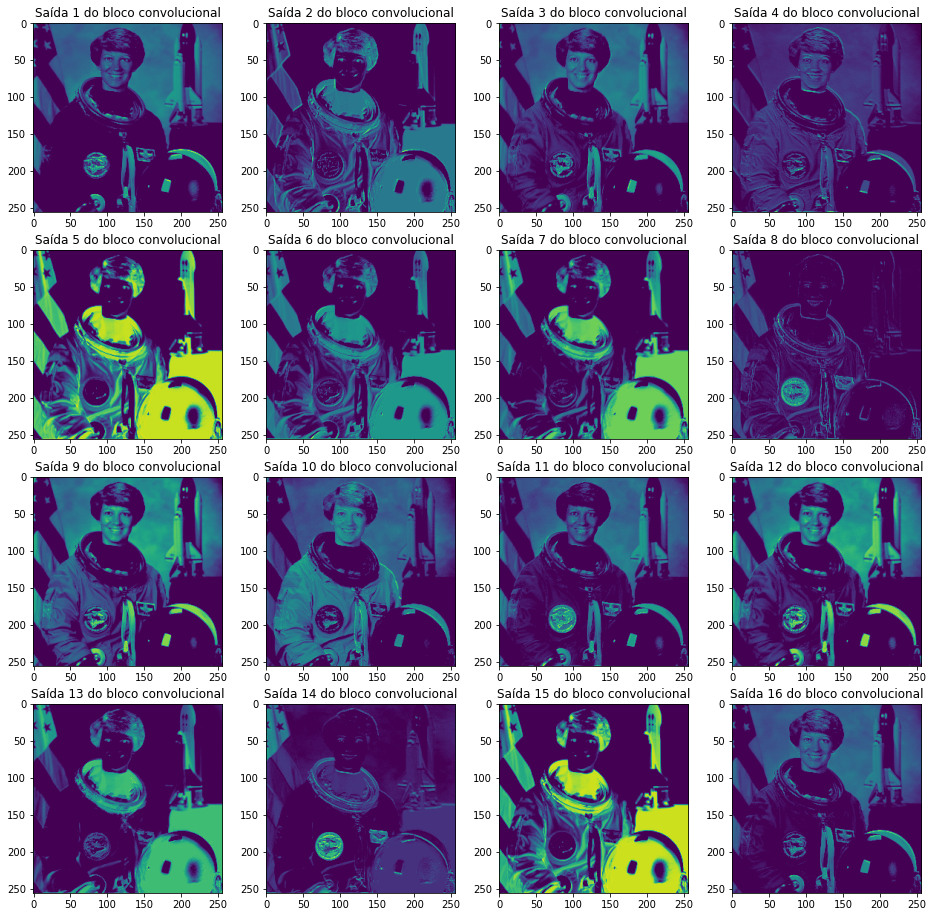

In [100]:
fig, ax = plt.subplots(4, 4, figsize=(16, 16))
for i in range(4):
    for j in range(4):
        n = 4 * i + j
        ax[i, j].imshow(saida[0][n].detach().numpy())
        ax[i, j].set_title(f"Saída {n + 1} do bloco convolucional")

# Treino do zero no Pytorch

In [101]:
import torch
from torch import nn

from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import matplotlib.pyplot as plt

Implementando LeNet

In [102]:
args = {
    'epochs': 200,
    'lr': 1e-3,
    'weight_decay': 5e-4,
    'batch_size': 50,
    'device': torch.device('cuda' if torch.cuda.is_available() else 'cpu')
}

In [103]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.layer1 = nn.Sequential(
            # Entrada (b, 3, 32, 32) -> saída (b, 6, 28, 28)
            nn.Conv2d(3, 6, kernel_size=5),
            nn.BatchNorm2d(6),
            nn.Tanh(),
            # Entrada (b, 6, 28, 28) -> saída (b, 6, 14, 14)
            nn.AvgPool2d(kernel_size=2)
        )
        
        self.layer2 = nn.Sequential(
            # Entrada (b, 6, 14, 14) -> saída (b, 16, 10, 10)
            nn.Conv2d(6, 16, kernel_size=5),
            nn.BatchNorm2d(16),
            nn.Tanh(),
            # Entrada (b, 16, 10, 10) -> saída (b, 16, 5, 5)
            nn.AvgPool2d(kernel_size=2)
        )
        
        self.layer3 = nn.Sequential(
            # Entrada (b, 16, 5, 5) -> saída (b, 120, 1, 1)
            nn.Conv2d(16, 120, kernel_size=5),
            nn.BatchNorm2d(120),
            nn.Tanh(),
            # Entrada (b, 120, 1, 1) -> saída (b, N=120*1*1)
            nn.Flatten()
        )
        
        self.mlp = nn.Sequential(
            # Entrada (b, N=120*1*1) -> saída (b, 84)
            nn.Linear(120, 84),
            nn.Tanh(),
            # Entrada (b, 84) -> saída (b, 10)
            nn.Linear(84, 10)
        )
        
        self.softmax = nn.Softmax()
        
    def forward(self, X):
        out_layer1 = self.layer1(X)
        out_layer2 = self.layer2(out_layer1)
        out_layer3 = self.layer3(out_layer2)
        mlp = self.mlp(out_layer3)
        out = self.softmax(mlp)
        
        return out

In [104]:
LeNet = LeNet()
LeNet.to(args['device'])

LeNet

LeNet(
  (layer1): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Tanh()
    (3): AvgPool2d(kernel_size=2, stride=2, padding=0)
  )
  (layer2): Sequential(
    (0): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Tanh()
    (3): AvgPool2d(kernel_size=2, stride=2, padding=0)
  )
  (layer3): Sequential(
    (0): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(120, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Tanh()
    (3): Flatten(start_dim=1, end_dim=-1)
  )
  (mlp): Sequential(
    (0): Linear(in_features=120, out_features=84, bias=True)
    (1): Tanh()
    (2): Linear(in_features=84, out_features=10, bias=True)
  )
  (softmax): Softmax(dim=None)
)

In [105]:
train_set = datasets.CIFAR10(
    root='./datasets/',
    train=True,
    download=True,
    transform=transforms.ToTensor()
)

test_set = datasets.CIFAR10(
    root='./datasets/',
    train=False,
    download=True,
    transform=transforms.ToTensor()
)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./datasets/cifar-10-python.tar.gz to ./datasets/
Files already downloaded and verified


In [106]:
train_loader = DataLoader(
    train_set,
    batch_size=args['batch_size'],
    shuffle=True
)

test_loader = DataLoader(
    test_set,
    batch_size=args['batch_size'],
    shuffle=True
)

## Estratégias de Treino

In [107]:
from torch import optim

from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import time, os

In [108]:
criterion = nn.CrossEntropyLoss().to(args['device'])

In [109]:
optimizer = optim.Adam(LeNet.parameters(), lr=args['lr'], weight_decay=args['weight_decay'])

In [110]:
def train(train_loader, net, epoch):

  # Training mode
  net.train()

  start = time.time()

  epoch_loss  = []
  pred_list, rotulo_list = [], []
  for batch in train_loader:
    
    dado, rotulo = batch
    
    # Cast do dado na GPU
    dado = dado.to(args['device'])
    rotulo = rotulo.to(args['device'])
    
    # Forward
    ypred = net(dado)
    loss = criterion(ypred, rotulo)
    epoch_loss.append(loss.cpu().data)

    _, pred = torch.max(ypred, axis=1)
    pred_list.append(pred.cpu().numpy())
    rotulo_list.append(rotulo.cpu().numpy())
    
    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
  epoch_loss = np.asarray(epoch_loss)
  pred_list  = np.asarray(pred_list).ravel()
  rotulo_list  = np.asarray(rotulo_list).ravel()

  acc = accuracy_score(pred_list, rotulo_list)

  end = time.time()
  print('#################### Train ####################')
  print('Epoch %d, Loss: %.4f +/- %.4f, Acc: %.2f, Time: %.2f' % (epoch, epoch_loss.mean(), epoch_loss.std(), acc*100, end-start))

  return epoch_loss.mean()
    

In [111]:
def validate(test_loader, net, epoch):

  # Evaluation mode
  net.eval()
  
  start = time.time()
  
  epoch_loss  = []
  pred_list, rotulo_list = [], []
  with torch.no_grad(): 
    for batch in test_loader:

      dado, rotulo = batch

      # Cast do dado na GPU
      dado = dado.to(args['device'])
      rotulo = rotulo.to(args['device'])

      # Forward
      ypred = net(dado)
      loss = criterion(ypred, rotulo)
      epoch_loss.append(loss.cpu().data)

      _, pred = torch.max(ypred, axis=1)
      pred_list.append(pred.cpu().numpy())
      rotulo_list.append(rotulo.cpu().numpy())

  epoch_loss = np.asarray(epoch_loss)
  pred_list  = np.asarray(pred_list).ravel()
  rotulo_list  = np.asarray(rotulo_list).ravel()

  acc = accuracy_score(pred_list, rotulo_list)
  
  end = time.time()
  print('********** Validate **********')
  print('Epoch %d, Loss: %.4f +/- %.4f, Acc: %.2f, Time: %.2f\n' % (epoch, epoch_loss.mean(), epoch_loss.std(), acc*100, end-start))
  
  return epoch_loss.mean()

In [112]:
import warnings
warnings.filterwarnings('ignore')

train_losses, test_losses = [], []
for epoch in range(args['epochs']):
  
  # Train
  train_losses.append(train(train_loader, LeNet, epoch))
  
  # Validate
  test_losses.append(validate(test_loader, LeNet, epoch))

#################### Train ####################
Epoch 0, Loss: 2.0994 +/- 0.0675, Acc: 36.61, Time: 10.50
********** Validate **********
Epoch 0, Loss: 2.0509 +/- 0.0522, Acc: 41.17, Time: 1.39

#################### Train ####################
Epoch 1, Loss: 2.0283 +/- 0.0563, Acc: 43.42, Time: 9.84
********** Validate **********
Epoch 1, Loss: 2.0587 +/- 0.0598, Acc: 39.57, Time: 1.37

#################### Train ####################
Epoch 2, Loss: 1.9999 +/- 0.0593, Acc: 46.33, Time: 9.77
********** Validate **********
Epoch 2, Loss: 2.0762 +/- 0.0610, Acc: 37.96, Time: 1.35

#################### Train ####################
Epoch 3, Loss: 1.9770 +/- 0.0584, Acc: 48.69, Time: 10.45
********** Validate **********
Epoch 3, Loss: 1.9844 +/- 0.0594, Acc: 47.49, Time: 1.38

#################### Train ####################
Epoch 4, Loss: 1.9623 +/- 0.0583, Acc: 50.12, Time: 9.87
********** Validate **********
Epoch 4, Loss: 1.9989 +/- 0.0603, Acc: 45.70, Time: 1.36

#################### Train #

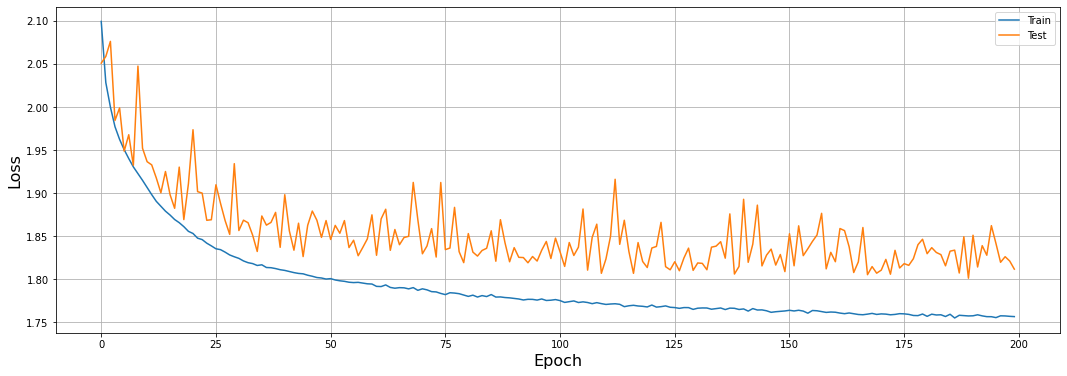

In [113]:
plt.figure(figsize=(18, 6))

epochs = np.linspace(0, args['epochs']-1, args['epochs'])

plt.plot(epochs, train_losses, label='Train')
plt.plot(epochs, test_losses, label='Test')

plt.xlabel("Epoch", fontsize=16)
plt.ylabel("Loss", fontsize=16)
plt.legend()

plt.grid()
plt.show()

## Extração de características

Usaremos um modelos pré-treinado no ImageNet, um dataset com 1000 classes de objeto. Até os dias atuais, modelos pré-treinados nesse conjunto de dados produzem características que servem como base para inúmeras aplicações.

O carregamento de dados deve seguir o mesmo pré-processamento do treinamento do modelo utilizado.

Usaremos uma composição de transformações do pytorch para realizar múltiplas trasnformaçoes no dado.

In [114]:
data_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
         std=[0.229, 0.224, 0.225]
    )
])

In [115]:
train_set = datasets.CIFAR10(
    root='./datasets/',
    train=True,
    download=True,
    transform=data_transform
)

test_set = datasets.CIFAR10(
    root='./datasets/',
    train=False,
    download=True,
    transform=data_transform
)

Files already downloaded and verified
Files already downloaded and verified


### Adaptando a rede

https://pytorch.org/vision/stable/models.html

In [116]:
from torchvision import models

In [117]:
net = models.vgg16_bn(pretrained=True).to(args['device'])

net

Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/hub/checkpoints/vgg16_bn-6c64b313.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

Precisamos remover pelo menos a última camada, que é a camada que produz as 1000 probabilidades.

In [118]:
list(net.named_children())

[('features', Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256, ker

In [119]:
list(net.children())[-1]

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)

In [120]:
novo_classifier = list(net.children())[-1][:-3]

novo_classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
)

In [121]:
net.classifier = nn.Sequential(*novo_classifier).to(args['device'])

net

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [122]:
def extrai_caracteristicas(net, loader):

  # Evaluation mode
  net.eval()

  feat_list, rotulo_list = [], []
  with torch.no_grad(): 
    for k, batch in enumerate(loader):
      print('\r--{0}/{1}--'.format(k+1, len(loader)), end='', flush=True)

      dado, rotulo = batch

      # Cast do dado na GPU
      dado = dado.to(args['device'])
      rotulo = rotulo.to(args['device'])

      # Extração
      caracteristica = net(dado)
      feat_list.append(caracteristica.detach().cpu().numpy())
      rotulo_list.append(rotulo.detach().cpu().numpy())

  feat_list    = np.asarray(feat_list)
  feat_list    = np.reshape(feat_list, (feat_list.shape[0]*feat_list.shape[1], feat_list.shape[2]))

  rotulo_list  = np.asarray(rotulo_list).ravel()
 
  return feat_list, rotulo_list

In [123]:
print('Load train')
train_X, train_Y = extrai_caracteristicas(net, train_loader)
print('\nLoad test')
test_X,  test_Y  = extrai_caracteristicas(net, test_loader)

Load train
--1000/1000--
Load test
--200/200--

In [148]:
from sklearn.svm import LinearSVC

clf = LinearSVC()
clf.fit(train_X, train_Y)

pred = clf.predict(test_X)
print('{:.2f}%'.format(accuracy_score(test_Y, pred)*100))

54.42%


## Fine-Tuning
- Substituir a camada de classificação da rede original
- "Congelar" camadas iniciais da rede, para preservar seus pesos
- Definir múltiplas taxas de aprendizado para treinar as camadas finais

### Adaptando a Rede

In [137]:
net = models.vgg16_bn(pretrained=True).to(args['device'])

net

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

Dessa ver vamos redefinir a camada de classificação, criando uma noa camada de dimensões adequadas ao nosso problema.

- O modelo original classificava as 1000 classes da ImageNet
  - `nn.Linear(in_features, 1000)`
- Nossa adaptação irá classificar 10 classes do CIFAR10
  - `nn.Linear(in_features, 10)`

In [138]:
list(net.children())[-1]

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)

In [139]:
in_features = list(net.children())[-1][-1].in_features

in_features

4096

In [140]:
my_clf = list(net.classifier.children())[:-1]

my_clf.append(
    nn.Linear(in_features, 10)
)

In [141]:
my_clf

[Linear(in_features=25088, out_features=4096, bias=True),
 ReLU(inplace=True),
 Dropout(p=0.5, inplace=False),
 Linear(in_features=4096, out_features=4096, bias=True),
 ReLU(inplace=True),
 Dropout(p=0.5, inplace=False),
 Linear(in_features=4096, out_features=10, bias=True)]

In [142]:
net.classifier = nn.Sequential(*my_clf)

net.to(args['device'])

net

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

### Definindo múltiplas taxas de aprendizado

In [143]:
optimizer = optim.Adam([
  {'params': net.features.parameters(), 'lr': args['lr'] * 0.2, 'weight_decay': args['weight_decay'] * 0.2},
  {'params': net.classifier.parameters(), 'lr': args['lr'], 'weight_decay': args['weight_decay']},
], lr=0)

In [144]:
criterion = nn.CrossEntropyLoss().to(args['device'])

In [145]:
import warnings
warnings.filterwarnings('ignore')

train_losses, test_losses = [], []
for epoch in range(15):
  
  # Train
  train_losses.append(train(train_loader, net, epoch))
  
  # Validate
  test_losses.append(validate(test_loader, net, epoch))

#################### Train ####################
Epoch 0, Loss: 0.8503 +/- 0.3522, Acc: 74.08, Time: 97.05
********** Validate **********
Epoch 0, Loss: 0.5781 +/- 0.1791, Acc: 82.85, Time: 4.13

#################### Train ####################
Epoch 1, Loss: 0.4738 +/- 0.1572, Acc: 86.18, Time: 97.04
********** Validate **********
Epoch 1, Loss: 0.4557 +/- 0.1472, Acc: 86.12, Time: 4.11

#################### Train ####################
Epoch 2, Loss: 0.5820 +/- 0.5846, Acc: 85.02, Time: 96.88
********** Validate **********
Epoch 2, Loss: 0.4979 +/- 0.1344, Acc: 84.72, Time: 4.11

#################### Train ####################
Epoch 3, Loss: 1.2534 +/- 2.4659, Acc: 78.81, Time: 96.85
********** Validate **********
Epoch 3, Loss: 1.1770 +/- 0.3026, Acc: 62.30, Time: 4.13

#################### Train ####################
Epoch 4, Loss: 0.8920 +/- 0.9581, Acc: 78.62, Time: 96.82
********** Validate **********
Epoch 4, Loss: 0.5649 +/- 0.2697, Acc: 82.95, Time: 4.12

#################### Trai

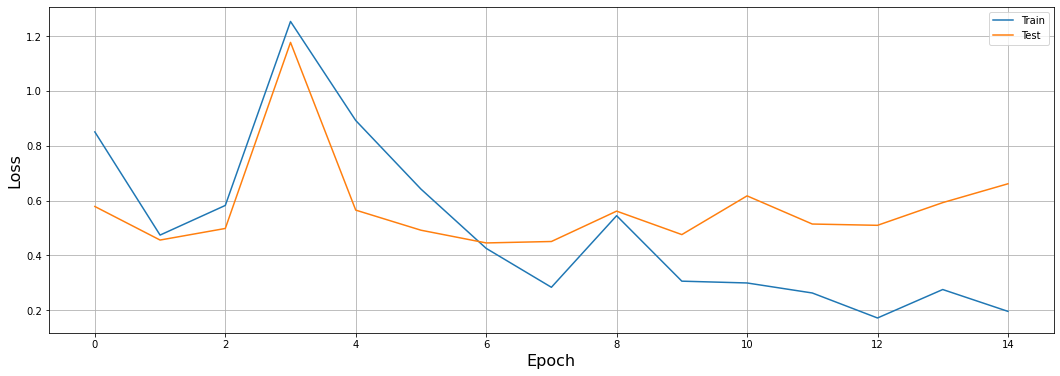

In [147]:
plt.figure(figsize=(18, 6))

epochs = np.linspace(0, 15-1, 15)

plt.plot(epochs, train_losses, label='Train')
plt.plot(epochs, test_losses, label='Test')

plt.xlabel("Epoch", fontsize=16)
plt.ylabel("Loss", fontsize=16)
plt.legend()

plt.grid()
plt.show()